In [40]:
import matplotlib.pyplot as plt
from matplotlib import patches
import numpy as np
import pandas as pd

# Analysing Workload of Cobots / Batches

In [32]:
listee = {'OutD0_0': [16.59], 'OutD0_1': [9.5, 8.25], 
          'OutD0_3': [11.79, 5.37, 0.69], 'OutD0_4': [10.269999999999998, 2.93, 4.25], 
          'OutD0_5': [1.61, 13.52, 1.9], 'OutD0_7': [2.51, 8.88, 3.27], 
          'OutD0_8': [17.230000000000004], 'OutD1_9': [15.120000000000001], 
          'OutD0_10': [16.18], 'OutD0_2': [7.06, 5.01]}

In [37]:
listee = {'OutD0_0': [17.230000000000004], 'OutD0_1': [9.5, 8.25], 'OutD0_2': [1.9, 3.27], 
          'OutD1_3': [11.79, 5.37, 0.69], 'OutD1_4': [10.269999999999998, 2.93, 4.25], 
          'OutD1_5': [16.18, 1.61], 'OutD1_6': [8.88, 7.06], 'OutD1_7': [5.01, 2.51], 
          'OutD1_8': [13.52], 'OutD1_9': [16.59], 'OutD1_10': [15.120000000000001]}

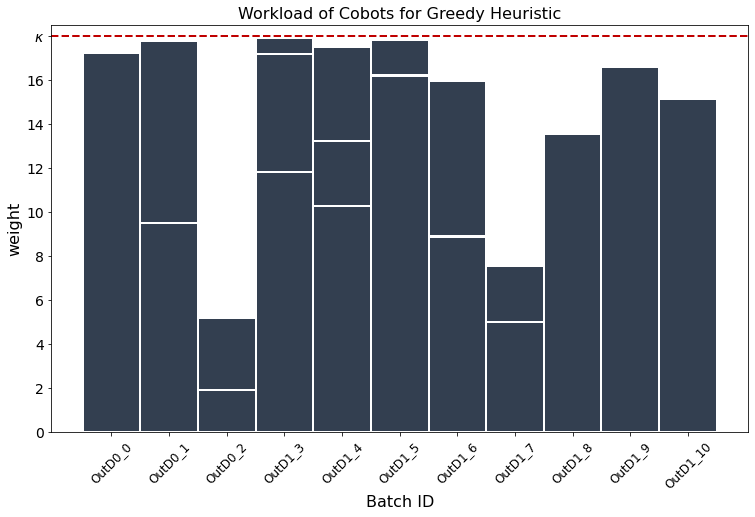

In [65]:
width = 2
toggle_h = .3
toggle_v = .01
fig, ax = plt.subplots()
for count, value in enumerate(listee.values()):
    curr_height = 0
    for height in value:
        rect = patches.Rectangle((count*width, curr_height), 
                                 width=width, height=height,
                                 facecolor = '#333F50', edgecolor = 'w', lw=2)
        curr_height += height+toggle_v        
        ax.add_patch(rect)
ax.autoscale_view()
ax.figure.canvas.draw()

box_widths = np.arange(0, len(listee.keys())*width+1, width)
xticks = []
for first, second in zip(box_widths, box_widths[1:]):
    xticks.append((first + second) / 2)
ax.set_xticks(xticks)
ax.set_xticklabels(listee.keys())
ax.axhline(y=18, c="#C00000", lw=2, linestyle="--")
ax.set_yticks(np.arange(0, 19, 2))
ax.set_yticklabels(list(np.arange(0, 17, 2))+["$\kappa$"])
ax.tick_params(axis="y", which='major', labelsize=14)
ax.tick_params(axis='x', which='major', labelsize=12, rotation=45)
ax.set_ylabel("weight", fontsize=16)
ax.set_xlabel("Batch ID", fontsize=16)
ax.set_ylim((0,18.5))
plt.title("Workload of Cobots for Greedy Heuristic", fontsize=16)
fig.set_size_inches(12.5, 7.5)
#ax.set_aspect('equal')
plt.savefig('../../../figures/sol.eps',bbox_inches='tight', transparent="False", format="eps")
plt.show()

# Runtime Analysis

In [56]:
# sku 24, orders_10_mean_1x6_sku, dedicated
runtime_dict_24_10 = {0: 85.1, 5: 66.2, 10: 64.39999999999999, 
                      20: 64.39999999999999, 30: 64.4, 50: 64.4, 70: 64.39999999999999}
runtime_dict_24_10 = {k: (v -  minimum) / v for minimum in (min(runtime_dict_24_10.values()),) for k, v in runtime_dict_24_10.items()}

In [57]:
runtime_dict_360_10 = {0: 819.5999999999997, 5: 750.8999999999996, 10: 755.1999999999998, 
                       20: 738.5999999999997, 30: 763.1999999999998, 50: 748.7999999999997, 70: 741.8999999999997}
runtime_dict_360_10 = {k: (v - minimum) / v for minimum in (min(runtime_dict_360_10.values()),) for k, v in runtime_dict_360_10.items()}

In [58]:
df_24_10 = pd.DataFrame.from_dict(runtime_dict_24_10, orient="index").reset_index()
df_24_10.columns = ["Runtime", "Fitness (24, 10)"]
df_360_10 = pd.DataFrame.from_dict(runtime_dict_360_10, orient="index").reset_index()
df_360_10.columns = ["Runtime", "Fitness (360, 10)"]

In [59]:
df = df_24_10.merge(df_360_10)

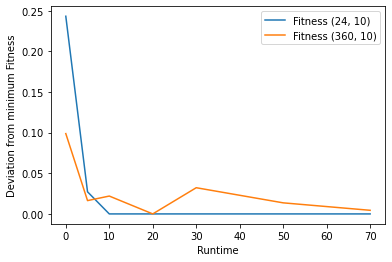

In [63]:
df.plot(x="Runtime")
plt.ylabel("Deviation from minimum Fitness")
plt.show()